# 1) Data Preparation and Exploration

Calling the data from Binance requires an active account in Binance, registered API key and secrets. For simplicity, run the following command to call all the BTCUSDT 1-minute ohlcv data from Binance (data are already called and saved):

```{python}
python binance_data_calling.py -c BTCUSDT -s 2020-12-01 -e 2020-12-31
```

All data will be stored inside directory ~/input_data/*.

Then we can have a look on the structure of the data retrieved.

---

In [54]:
import pandas as pd
import os
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
file_list = sorted(os.listdir('./input_data'))
print(len(file_list), 'data files in ~/input_data : \n')
for i in file_list[:5]:
    print(i)

363 data files in ~/input_data : 

BTCUSDT_2020-01-01.csv
BTCUSDT_2020-01-02.csv
BTCUSDT_2020-01-03.csv
BTCUSDT_2020-01-04.csv
BTCUSDT_2020-01-05.csv


Let's take a look at the structure of each file.

---

In [8]:
df = pd.read_csv('./input_data/BTCUSDT_2020-01-01.csv')

In [10]:
df.head()

,date_time,open,high,low,close,volume
0,2020-01-01 00:00:00,7195.00,7200.25,7186.77,7200.25,57.777035
1,2020-01-01 00:01:00,7200.25,7220.37,7200.22,7217.70,76.136927
2,2020-01-01 00:02:00,7217.70,7220.81,7211.32,7215.01,41.826715
3,2020-01-01 00:03:00,7215.06,7221.99,7214.42,7217.57,18.940854
4,2020-01-01 00:04:00,7217.58,7218.98,7209.04,7211.65,39.764474


In [12]:
print('First timestamp of the day is', df.loc[0, 'date_time'])
print('Last  timestamp of the day is', df.loc[len(df) - 1, 'date_time'])

First timestamp of the day is 2020-01-01 00:00:00
Last  timestamp of the day is 2020-01-01 23:59:00


Since BTCUSDT are traded 24/7 on Binance, we can combine all daily dataframe into one big dataframe for easier computation.

---

In [26]:
# Use 3 days as an example

df = pd.concat([pd.read_csv(f'./input_data/{i}') for i in file_list[:3]])
print('Shape of combined df =', df.shape)

Shape of combined df = (4320, 6)


In [27]:
df.head()

,date_time,open,high,low,close,volume
0,2020-01-01 00:00:00,7195.00,7200.25,7186.77,7200.25,57.777035
1,2020-01-01 00:01:00,7200.25,7220.37,7200.22,7217.70,76.136927
2,2020-01-01 00:02:00,7217.70,7220.81,7211.32,7215.01,41.826715
3,2020-01-01 00:03:00,7215.06,7221.99,7214.42,7217.57,18.940854
4,2020-01-01 00:04:00,7217.58,7218.98,7209.04,7211.65,39.764474


In [28]:
df.tail()

,date_time,open,high,low,close,volume
1435,2020-01-03 23:55:00,7311.97,7313.35,7302.49,7305.43,51.299776
1436,2020-01-03 23:56:00,7307.90,7309.13,7300.67,7301.86,33.387669
1437,2020-01-03 23:57:00,7301.84,7309.98,7298.62,7304.99,193.453633
1438,2020-01-03 23:58:00,7304.99,7317.00,7304.99,7311.97,192.787757
1439,2020-01-03 23:59:00,7311.83,7321.44,7311.31,7320.18,83.421638


We can use a python package - mplfinance, to visualize the ohlcv data we just generated.
Use the following command to download the package:

```
pip install mplfinance
```

Detailed documentation can be found in GitHub:

> https://github.com/matplotlib/mplfinance

---

In [29]:
!pip install mplfinance

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


Then we can import the package and visualize our data.

---

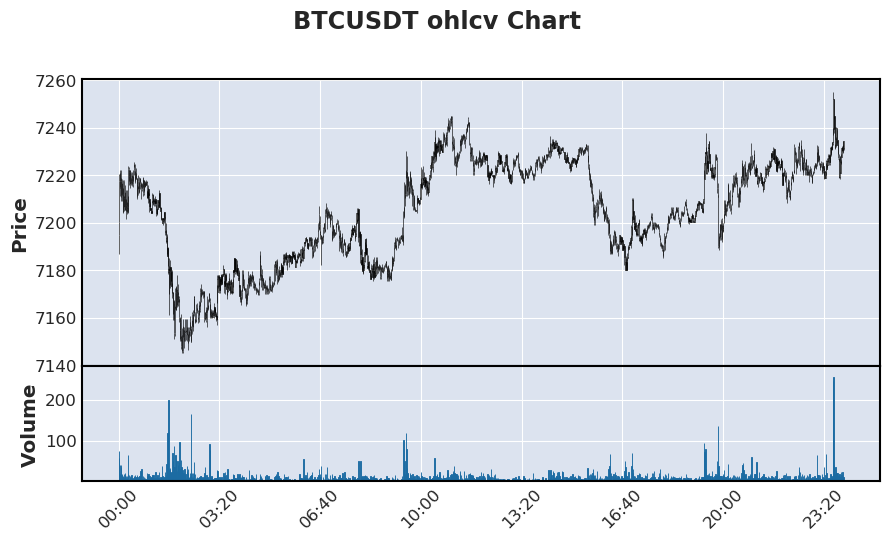

In [36]:
import mplfinance as mpf

df = pd.concat([pd.read_csv(f'./input_data/{i}') for i in file_list[:1]])
df.index = pd.to_datetime(df.date_time)
df.columns = [i.capitalize() for i in df.columns]
mpf.plot(df, type='candle', style='default', volume=True, figratio=(27,14), title='BTCUSDT ohlcv Chart')

We can also try plotting the distribution of 1-minute price changes.

---


In [52]:
df = pd.concat([pd.read_csv(f'./input_data/{i}') for i in file_list[:5]])
df.loc[:, '1M_CHANGE'] = df['close'].pct_change()
df.loc[:, '1M_BPS_CHANGE'] = df['1M_CHANGE'] * 10000  # 1 bps (basis point) change = 0.01% change, a common practice in financial predictive modelling

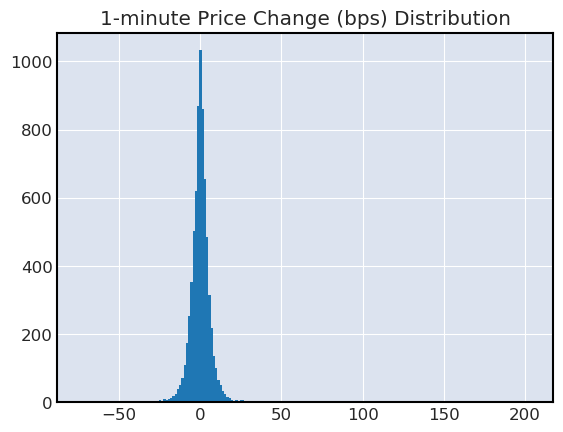

In [53]:
import matplotlib.pyplot as plt

plt.hist(df['1M_BPS_CHANGE'], bins=200)
plt.title('1-minute Price Change (bps) Distribution')
plt.show()

Then, we can continue to take benchmark model as a warm-up exercise to work around with this dataset.

---